# In this notebook we preprocess pilot data from the mTurk word study

### Import libraries that are necessary for analysis

In [1]:
import pandas as pd
import numpy as np
from io import StringIO
from matplotlib import pyplot as plt

### Read csv file as Pandas dataframe for convenient io

In [2]:
df = pd.read_csv('Batch_3459975_batch_results (1).csv')

We list out the column headers to see what kind of data we have. What we really want is the `Answer.data` column

In [3]:
df.columns

Index(['HITId', 'HITTypeId', 'Title', 'Description', 'Keywords', 'Reward',
       'CreationTime', 'MaxAssignments', 'RequesterAnnotation',
       'AssignmentDurationInSeconds', 'AutoApprovalDelayInSeconds',
       'Expiration', 'NumberOfSimilarHITs', 'LifetimeInSeconds',
       'AssignmentId', 'WorkerId', 'AssignmentStatus', 'AcceptTime',
       'SubmitTime', 'AutoApprovalTime', 'ApprovalTime', 'RejectionTime',
       'RequesterFeedback', 'WorkTimeInSeconds', 'LifetimeApprovalRate',
       'Last30DaysApprovalRate', 'Last7DaysApprovalRate', 'Answer.code',
       'Answer.codevalidator', 'Answer.data', 'Approve', 'Reject'],
      dtype='object')

#### Now the data for each participant is also its own comma-separated data instance. We read in each such nested data using Pandas again, with a dummy buffer to emulate a file

In [4]:
data = []
for hitid, entry in zip(df['HITId'], df['Answer.data']):
    print(hitid, end='; ')
    buffer = StringIO(entry)
    data += [pd.read_csv(buffer)]

30QQTY5GMLIDH92CLFRZSLO6K7C7U5; 30QQTY5GMLIDH92CLFRZSLO6K7C7U5; 30QQTY5GMLIDH92CLFRZSLO6K7C7U5; 30QQTY5GMLIDH92CLFRZSLO6K7C7U5; 30QQTY5GMLIDH92CLFRZSLO6K7C7U5; 

We take a look at what columns are available and pick the ones we're most interested in (for now)

In [5]:
data[0].columns

Index(['view_history', 'rt', 'trial_type', 'trial_index', 'time_elapsed',
       'internal_node_id', 'stimulus', 'key_press', 'test_part', 'attribute',
       'correct_response', 'task', 'text', 'response_expected', 'yes_key',
       'no_key', 'initial_incorrect', 'correct', 'false_alarm', 'missed'],
      dtype='object')

We pick out only the stimuli - we try this on the first dataframe first. Then we filter all the datasets.

In [6]:
data[0][data[0]['test_part'] == 'stimulus'][['text','attribute','response_expected','rt','task','correct',
                                             'initial_incorrect','test_part']].head(10)

text attribute response_expected      rt task  correct  \
9    advance         W             False     NaN  sem      0.0   
11    remark         W             False  1478.0  sem      1.0   
13      crop         W             False  1596.0  sem      1.0   
15   harvest         S              True   968.0  sem      1.0   
17     angle         W             False  1336.0  sem      1.0   
19      bran         W             False  1432.0  sem      1.0   
21  phriding         N             False   946.0  sem      1.0   
23      blur         W             False  1388.0  sem      1.0   
25      stir         R             False  1106.0  sem      1.0   
27   reverse         W             False  1698.0  sem      1.0   

   initial_incorrect test_part  
9              false  stimulus  
11             false  stimulus  
13             false  stimulus  
15             false  stimulus  
17             false  stimulus  
19             false  stimulus  
21             false  stimulus  
23             false  stimulus  
25             false  stimulus  
27             false  stimulus

### Filter to only keep valid stimulus data

In [7]:
filtered = []
for dataframe in data:
    f = dataframe[dataframe['test_part'] == 'stimulus'][['text','attribute','response_expected','rt','task','correct',
                                                         'initial_incorrect','test_part']]
    filtered.append(f)

#### See an example plot before looking at more plots

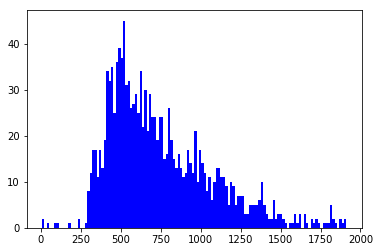

In [8]:
plt.hist(filtered[0]['rt'][filtered[0]['correct']==1], bins=128, color='blue')
plt.show()

### Use pyplot subplots to plot histograms corresponding to each task
Accuracy here is defined as $#(true positives)/#(total)$

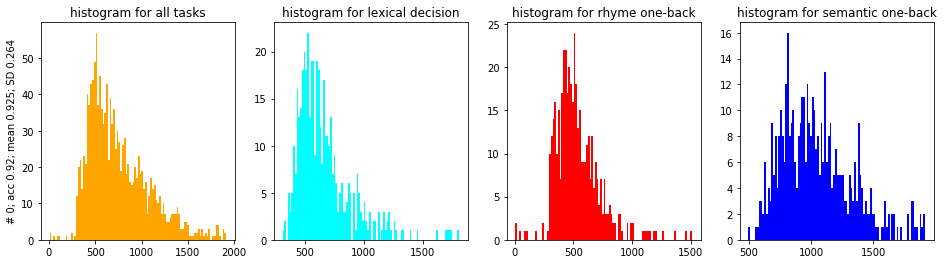

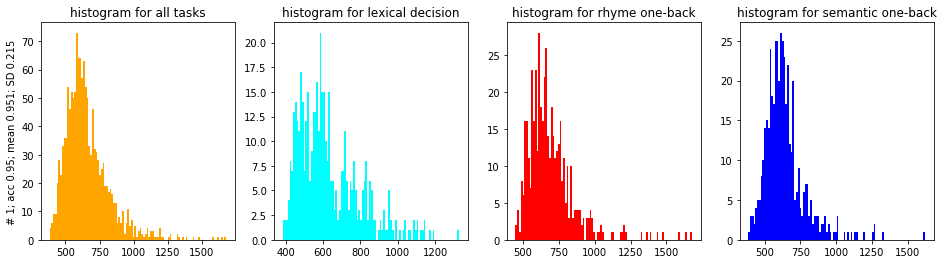

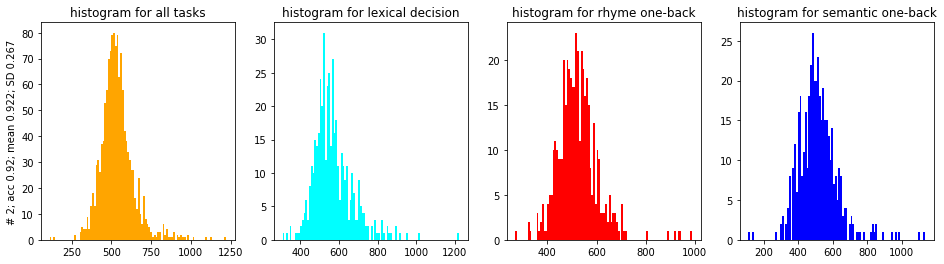

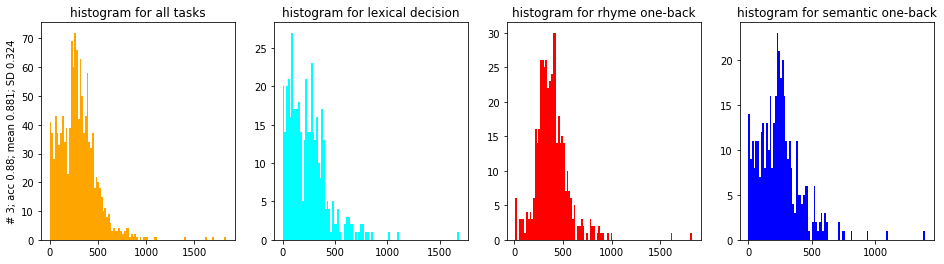

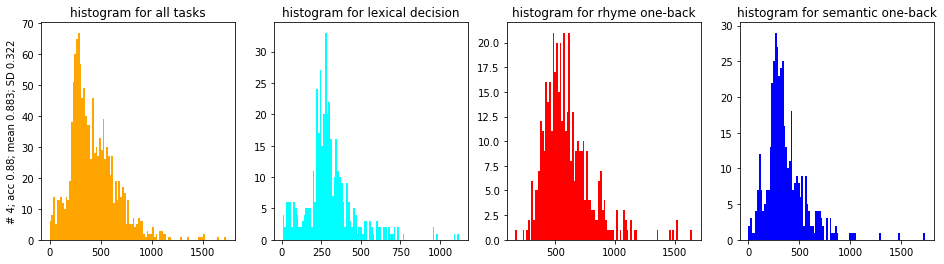

In [10]:
for i in range(5):
    fig, (ax0, ax1, ax2, ax3) = plt.subplots(1, 4)
    fig.set_figwidth(16)
    bins = 100

    ax0.hist(filtered[i]['rt'][filtered[i]['correct']==1], bins=bins, color='orange')
    ax0.set_title('histogram for all tasks')
    
    ax1.hist(filtered[i]['rt'][np.logical_and(filtered[i]['correct']==1,filtered[i]['task']=='lex')], bins=bins,
             color='cyan')
    ax1.set_title('histogram for lexical decision')
    
    ax2.hist(filtered[i]['rt'][np.logical_and(filtered[i]['correct']==1,filtered[i]['task']=='rhy')], bins=bins, 
             color='red')
    ax2.set_title('histogram for rhyme one-back')
    
    ax3.hist(filtered[i]['rt'][np.logical_and(filtered[i]['correct']==1,filtered[i]['task']=='sem')], bins=bins, 
             color='blue')
    ax3.set_title('histogram for semantic one-back')
    
    acc = sum(filtered[i]['correct'])/filtered[i].shape[0]
    sd = np.std(filtered[i]['correct'])
    mean = filtered[i]['correct'].mean()
    ax0.set_ylabel('# %d; acc %.2f; mean %.3f; SD %.3f'%(i,acc,mean,sd))

    plt.show()